# Групповая практика по линейной регрессии

Представьте что вы, невероятно богатый и успешный глава хедж-фонда, демонстрирующего рекордные показатели прибыли. К вам обращается очень серьезный и влиятельный (кстати, и очень опасный) инвестор. Он хочет приумножить свои миллионы и готов перевести деньги на ваш счет в течение часа. НО! Если вы допустите ошибку и потеряете часть его вложений, он объявит вам войну.
Вроде бы и не сложно, но именно в этот момент - на вашей дороге появляется достаточно сильный конкурент, который наступает вам на пятки. Ваша задача, проанализировать рынок и сделать все, чтобы найти оптимальный и наиболее выгодный вариант, чтобы удержаться в лидирующих позициях и не нажить себе сильного врага.

Данные, с которыми вы будете работать, можно скачать [здесь](https://www.nasdaq.com/market-activity/quotes/historical). Это *csv*-файлы, возьмите данные за последние 5 лет по нескольким компаниям (не менее трех).

In [101]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

In [102]:
price_re = re.compile(r'([\d.]+)')
def parse_price(value: str) -> str:
    return price_re.search(value).group(1)

In [103]:
def read_nasdaq_csv(filepath: str) -> pd.DataFrame:
    df = pd.read_csv(filepath)
    df.columns = ['Date', 'Close', 'Volume', 'Open', 'High', 'Low']
    df['Close'] = df['Close'].apply(parse_price).astype('float64')
    df['Open'] = df['Open'].apply(parse_price).astype('float64')
    df['High'] = df['High'].apply(parse_price).astype('float64')
    df['Low'] = df['Low'].apply(parse_price).astype('float64')
    df['Volume'] = df['Volume'].astype('int64')
    df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
    return df

In [104]:
aapl = read_nasdaq_csv('data/AAPL-20151210_20201210.csv')
aapl.head(5)

,Date,Close,Volume,Open,High,Low
0,2020-12-09,121.78,115089200,124.53,125.9500,121.00
1,2020-12-08,124.38,82225510,124.37,124.9800,123.09
2,2020-12-07,123.75,86711990,122.31,124.5700,122.25
3,2020-12-04,122.25,78260420,122.60,122.8608,121.52
4,2020-12-03,122.94,78967630,123.52,123.7800,122.21


In [105]:
msft = read_nasdaq_csv('data/MSFT-20151210_20201210.csv')
msft.head(5)

,Date,Close,Volume,Open,High,Low
0,2020-12-09,211.80,32440600,215.16,215.2250,211.214
1,2020-12-08,216.01,23284090,213.97,216.9500,212.890
2,2020-12-07,214.29,24620000,214.37,215.5400,212.990
3,2020-12-04,214.36,24666040,214.22,215.3800,213.180
4,2020-12-03,214.24,25120920,214.61,216.3757,213.650


In [106]:
amzn = read_nasdaq_csv('data/AMZN-20151210_20201210.csv')
amzn.head(5)

,Date,Close,Volume,Open,High,Low
0,2020-12-09,3104.20,4100836,3167.89,3174.43,3088.00
1,2020-12-08,3177.29,3286303,3158.90,3184.13,3120.02
2,2020-12-07,3158.00,2751316,3156.48,3180.76,3141.69
3,2020-12-04,3162.58,2913611,3198.21,3198.21,3158.76
4,2020-12-03,3186.73,2892039,3205.46,3228.64,3181.31


In [107]:
tsla = read_nasdaq_csv('data/TSLA-20151210_20201210.csv')
tsla.head(5)

,Date,Close,Volume,Open,High,Low
0,2020-12-09,604.48,71291190,653.6900,654.3200,588.00
1,2020-12-08,649.88,64265030,625.5050,651.2800,618.50
2,2020-12-07,641.76,56309710,604.9197,648.7856,603.05
3,2020-12-04,599.04,29401310,591.0100,599.0400,585.50
4,2020-12-03,593.38,42552000,590.0200,598.9700,582.43


## Задача 1: Визуализируй это

Загрузите данные и выполните следующие задания:
- постройте графики стоимости акций на начало каждого дня
- отразите на графике объёмы торгов за каждый день. Прокомментируйте полученные графики: определите, какие события могли повлиять на повышение объёма (отчёт компании, кризис и т. п.)
- добавьте ко всем графикам легенду
- определите, цены каких компаний наиболее и наименее скоррелированы

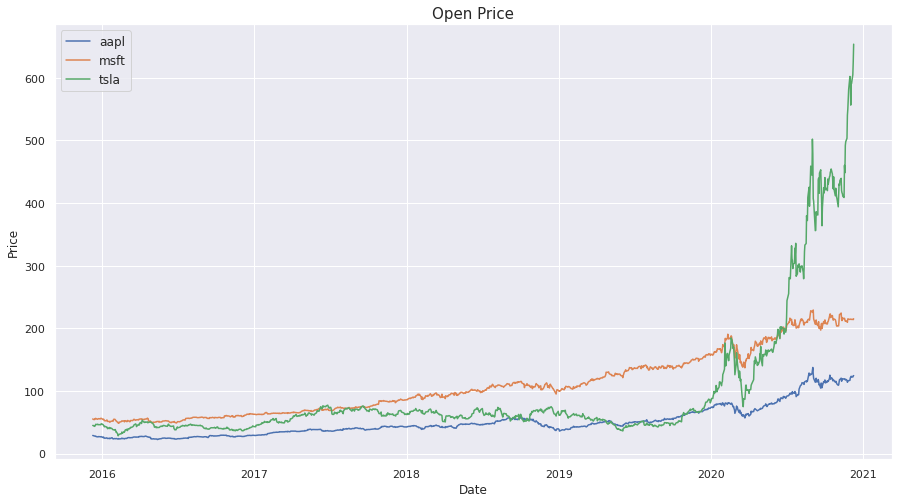

In [108]:
# plt.plot(df.Date, decomposition.trend, label='trend')
# plt.plot(df.Date, decomposition.seasonal, label='seasonal')
# plt.plot(df.Date, decomposition.resid, label='residual')

plt.figure(figsize=(15, 8))
plt.plot(aapl['Date'], aapl['Open'], label='aapl')
plt.plot(msft['Date'], msft['Open'], label='msft')
# plt.plot(amzn['Date'], amzn['Open'], label='amzn')
plt.plot(tsla['Date'], tsla['Open'], label='tsla')
plt.title('Open Price', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(fontsize=12)

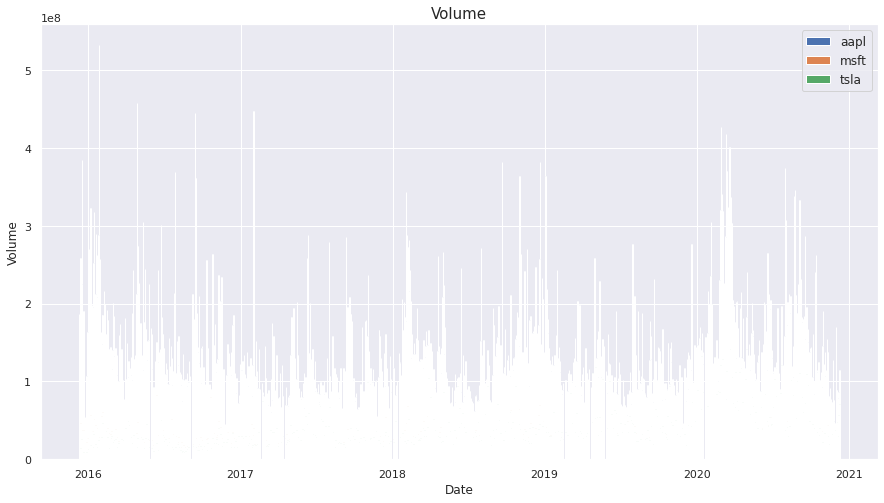

In [109]:
plt.figure(figsize=(15, 8))
plt.bar(aapl['Date'], aapl['Volume'], label='aapl')
plt.bar(msft['Date'], msft['Volume'], label='msft')
plt.bar(tsla['Date'], tsla['Volume'], label='tsla')
plt.title('Volume', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(fontsize=12)

In [86]:
aapl[['Open', 'Close', 'High', 'Low']].corr()

,Open,Close,High,Low
Open,1.000000,0.999298,0.999707,0.999566
Close,0.999298,1.000000,0.999621,0.999654
High,0.999707,0.999621,1.000000,0.999469
Low,0.999566,0.999654,0.999469,1.000000


In [84]:
msft[['Open', 'Close', 'High', 'Low']].corr()

,Open,Close,High,Low
Open,1.000000,0.999373,0.999702,0.999658
Close,0.999373,1.000000,0.999617,0.999676
High,0.999702,0.999617,1.000000,0.999458
Low,0.999658,0.999676,0.999458,1.000000


In [87]:
tsla[['Open', 'Close', 'High', 'Low']].corr()

,Open,Close,High,Low
Open,1.000000,0.998698,0.999412,0.999214
Close,0.998698,1.000000,0.999458,0.999330
High,0.999412,0.999458,1.000000,0.999093
Low,0.999214,0.999330,0.999093,1.000000


<AxesSubplot:>

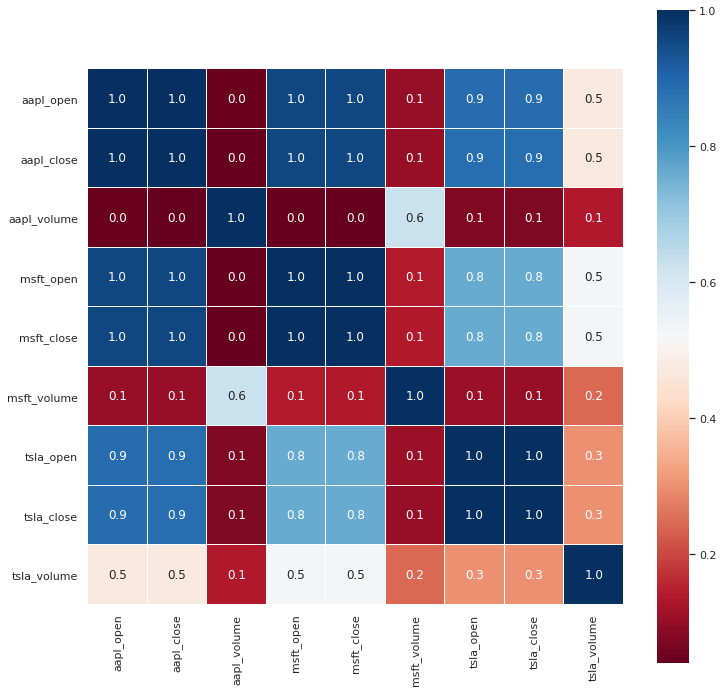

In [97]:
df = pd.DataFrame()
df[['aapl_open', 'aapl_close', 'aapl_volume']] = aapl[['Open', 'Close', 'Volume']]
df[['msft_open', 'msft_close', 'msft_volume']] = msft[['Open', 'Close', 'Volume']]
df[['tsla_open', 'tsla_close', 'tsla_volume']] = tsla[['Open', 'Close', 'Volume']]

sns.set(font_scale=1)
plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), square=True, annot=True, fmt='.01f', linewidths=0.1, cmap='RdBu')

In [99]:
df.corr()

,aapl_open,aapl_close,aapl_volume,msft_open,msft_close,msft_volume,tsla_open,tsla_close,tsla_volume
aapl_open,1.000000,0.999298,0.045569,0.955913,0.955371,0.103045,0.888002,0.887820,0.473011
aapl_close,0.999298,1.000000,0.043438,0.956273,0.956654,0.100639,0.886588,0.887046,0.473771
aapl_volume,0.045569,0.043438,1.000000,0.042497,0.040221,0.628300,0.075971,0.071594,0.136120
msft_open,0.955913,0.956273,0.042497,1.000000,0.999373,0.139441,0.762408,0.762259,0.528462
msft_close,0.955371,0.956654,0.040221,0.999373,1.000000,0.136592,0.761926,0.762334,0.528875
msft_volume,0.103045,0.100639,0.628300,0.139441,0.136592,1.000000,0.105110,0.101152,0.243327
tsla_open,0.888002,0.886588,0.075971,0.762408,0.761926,0.105110,1.000000,0.998698,0.299763
tsla_close,0.887820,0.887046,0.071594,0.762259,0.762334,0.101152,0.998698,1.000000,0.300818
tsla_volume,0.473011,0.473771,0.136120,0.528462,0.528875,0.243327,0.299763,0.300818,1.000000


## Задача 2: Смоделируй это

Обучите линейную регрессию для предсказания цены закрытия на текущий день. В качестве фичей возьмите цены открытия нескольких компаний за 7 дней до текущего (включая текущий день). Цель обучения - предсказать цену закрытия на последний день рассматриваемого промежутка для одной из компаний.

- Сравните результат с бейзлайном - возвращайте цену открытия в качестве предсказания. Для сравнения используйте *MSE* (Mean Square Error).
- Посчитайте функцию ошибки на обучающем множестве и на тестовом. В качестве тестового множества возьмите последние 100 дней.
- Удостоверьтесь, что на обучающем множестве вы можете легко побить бейзлайн (а на тестовом результат хуже, кроме одной акции с очевидным трендом).

Если вам удалось получить улучшение на тестовом множестве на всех акциях - поздравляем, вы можете легко заработать несколько миллионов!

In [130]:
aapl.shape[0], msft.shape[0], amzn.shape[0]

(1259, 1259, 1259)

In [123]:
df = pd.DataFrame()
columns = [
    'aapl_open_0', 'aapl_open_1', 'aapl_open_2', 'aapl_open_3', 'aapl_open_4', 'aapl_open_5', 'aapl_open_6',
    'msft_open_0', 'msft_open_1', 'msft_open_2', 'msft_open_3', 'msft_open_4', 'msft_open_5', 'msft_open_6',
    'amzn_open_0', 'amzn_open_1', 'amzn_open_2', 'amzn_open_3', 'amzn_open_4', 'amzn_open_5', 'amzn_open_6',
]

In [125]:
aapl.head(10)

,Date,Close,Volume,Open,High,Low
0,2020-12-09,121.78,115089200,124.53,125.9500,121.00
1,2020-12-08,124.38,82225510,124.37,124.9800,123.09
2,2020-12-07,123.75,86711990,122.31,124.5700,122.25
3,2020-12-04,122.25,78260420,122.60,122.8608,121.52
4,2020-12-03,122.94,78967630,123.52,123.7800,122.21
5,2020-12-02,123.08,89004200,122.02,123.3700,120.89
6,2020-12-01,122.72,128166800,121.01,123.4693,120.01
7,2020-11-30,119.05,169410200,116.97,120.9700,116.81
8,2020-11-27,116.59,46691330,116.57,117.4900,116.22
9,2020-11-25,116.03,76499230,115.55,116.7500,115.17


In [135]:
def get_week(df, key, start):
    return [
        df.loc[start + i, key]
        for i in range(0, 7)
    ]

In [135]:
for t in range(0, aapl.shape[0] - 7):
    w = get_week(aapl, 'Open', t)
    columns = ['aapl_open_0', 'aapl_open_1', 'aapl_open_2', 'aapl_open_3', 'aapl_open_4', 'aapl_open_5', 'aapl_open_6']
    df.loc[t, columns] = w
    
for t in range(0, msft.shape[0] - 7):
    w = get_week(aapl, 'Open', t)
    columns = ['msft_open_0', 'msft_open_1', 'msft_open_2', 'msft_open_3', 'msft_open_4', 'msft_open_5', 'msft_open_6']
    df.loc[t, columns] = w
    
for t in range(0, amzn.shape[0] - 7):
    w = get_week(aapl, 'Open', t)
    columns = ['amzn_open_0', 'amzn_open_1', 'amzn_open_2', 'amzn_open_3', 'amzn_open_4', 'amzn_open_5', 'amzn_open_6']
    df.loc[t, columns] = w

In [140]:
df['target'] = aapl['Close'][:-7]

In [142]:
df.head(5)

,aapl_open_0,aapl_open_1,aapl_open_2,aapl_open_3,aapl_open_4,aapl_open_5,aapl_open_6,msft_open_0,msft_open_1,msft_open_2,...,msft_open_5,msft_open_6,amzn_open_0,amzn_open_1,amzn_open_2,amzn_open_3,amzn_open_4,amzn_open_5,amzn_open_6,target
0,124.53,124.37,122.31,122.60,123.52,122.02,121.01,124.53,124.37,122.31,...,122.02,121.01,124.53,124.37,122.31,122.60,123.52,122.02,121.01,121.78
1,124.37,122.31,122.60,123.52,122.02,121.01,116.97,124.37,122.31,122.60,...,121.01,116.97,124.37,122.31,122.60,123.52,122.02,121.01,116.97,124.38
2,122.31,122.60,123.52,122.02,121.01,116.97,116.57,122.31,122.60,123.52,...,116.97,116.57,122.31,122.60,123.52,122.02,121.01,116.97,116.57,123.75
3,122.60,123.52,122.02,121.01,116.97,116.57,115.55,122.60,123.52,122.02,...,116.57,115.55,122.60,123.52,122.02,121.01,116.97,116.57,115.55,122.25
4,123.52,122.02,121.01,116.97,116.57,115.55,113.91,123.52,122.02,121.01,...,115.55,113.91,123.52,122.02,121.01,116.97,116.57,115.55,113.91,122.94


In [149]:
from sklearn.linear_model import LinearRegression

In [148]:
x = df.drop('target', axis=1)
y = df['target']

x_train = x.tail(x.shape[0] - 100).values
x_test = x.head(100).values

y_train = y.tail(y.shape[0] - 100).values
y_test = y.head(100).values

In [150]:
solver = LinearRegression()
solver.fit(x_train, y_train)

LinearRegression()

In [157]:
y_pred = solver.predict(x_test)

In [158]:
mse = mean_squared_error(y_test, y_pred)
mse

5.429608426232912

In [159]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}$')

RMSE: 2.33$


## Задача 3: Спроектируй (Докрути) это

Попробуйте разные варианты фичей, но не забывайте про переобучение - чем больше признаков, тем больше модель способна “запомнить” исходные данные и менее эффективна “реальных” данных. Далее приведём некоторые идеи для фичей.

**Идея для фичи No1.** Если взять цены в качестве исходных данных, модель будет плохо работать с будущим - цены, как правило, это сильно изменчивая категория. Имеет смысл рассмотреть относительные изменения цен за предыдущие N дней (буквально - насколько цены последующих дней отличаются от цен за предшествующий период).

**Идея для фичи No2.** В качестве альтернативы вы можете попробовать предсказать только коэффициент - во сколько раз изменится цена к вечеру текущего дня (но не забудьте произвести вычисление функции потерь на абсолютных значениях цены). Кроме того, можно добавить цену за последний день, чтобы модель могла вывести как коэффициент, так и абсолютное значение.

**Идея для фичи No3.** Можно использовать некоторые статистики - например, дисперсию цены за предыдущие дни, отклонения объёмов торгов и т. п. Можно брать скользящие средние за предыдущие несколько недель.

Удостоверьтесь, что все эти улучшения уменьшают ошибку по сравнению с обычной линейной регрессией на сырых ценах. Если вам удастся получить улучшение на тестовом множестве - это большой успех!

### Experiment 1. Volume Mean

In [229]:
for t in range(0, aapl.shape[0] - 7):
    w = get_week(aapl, 'Volume', t)
    m = np.mean(w)
    df.loc[t, 'aapl_volume_mean'] = m
    
for t in range(0, msft.shape[0] - 7):
    w = get_week(msft, 'Volume', t)
    m = np.mean(w)
    df.loc[t, 'msft_volume_mean'] = m
    
for t in range(0, amzn.shape[0] - 7):
    w = get_week(amzn, 'Volume', t)
    m = np.mean(w)
    df.loc[t, 'amzn_volume_mean'] = m

In [230]:
df.head(5)

,aapl_open_0,aapl_open_1,aapl_open_2,aapl_open_3,aapl_open_4,aapl_open_5,aapl_open_6,msft_open_0,msft_open_1,msft_open_2,...,amzn_open_2,amzn_open_3,amzn_open_4,amzn_open_5,amzn_open_6,target,aapl_volume_mean,msft_volume_mean,amzn_volume_mean,aapl_coef
0,124.53,124.37,122.31,122.60,123.52,122.02,121.01,124.53,124.37,122.31,...,122.31,122.60,123.52,122.02,121.01,121.78,9.406082e+07,2.639821e+07,3.373970e+06,1.022582
1,124.37,122.31,122.60,123.52,122.02,121.01,116.97,124.37,122.31,122.60,...,122.60,123.52,122.02,121.01,116.97,124.38,1.018210e+08,2.648738e+07,3.368696e+06,0.999920
2,122.31,122.60,123.52,122.02,121.01,116.97,116.57,122.31,122.60,123.52,...,123.52,122.02,121.01,116.97,116.57,123.75,9.674465e+07,2.523425e+07,3.241062e+06,0.988364
3,122.60,123.52,122.02,121.01,116.97,116.57,115.55,122.60,123.52,122.02,...,122.02,121.01,116.97,116.57,115.55,122.25,9.528569e+07,2.471895e+07,3.389503e+06,1.002863
4,123.52,122.02,121.01,116.97,116.57,115.55,113.91,123.52,122.02,121.01,...,121.01,116.97,116.57,115.55,113.91,122.94,1.003734e+08,2.604948e+07,3.487859e+06,1.004718


In [231]:
x = df.drop(['target'], axis=1)
y = df['target']

x_train = x.tail(x.shape[0] - 100).values
x_test = x.head(100).values

y_train = y.tail(y.shape[0] - 100).values
y_test = y.head(100).values

In [232]:
solver = LinearRegression()
solver.fit(x_train, y_train)M

LinearRegression()

In [233]:
y_pred = solver.predict(x_test)

In [234]:
mse = mean_squared_error(y_test, y_pred)
mse

1.7983540174590846

In [228]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse:.2f}$')

RMSE: 1.34$


In [ ]:
'aapl_volume_mean', 'amzn_volume_mean', 'msft_volume_mean'

### Experiment 2. Open/Close coef

In [221]:
for t in range(0, aapl.shape[0] - 7):
    o = aapl.loc[t, 'Open']
    c = aapl.loc[t, 'Close']
    df.loc[t, 'aapl_coef'] = o / c

In [224]:
x = df.drop(['target', ], axis=1)
y = df['target']

x_train = x.tail(x.shape[0] - 100).values
x_test = x.head(100).values

y_train = y.tail(y.shape[0] - 100).values
y_test = y.head(100).values